# Project description
**Our goal is simple: use machine learning to create a model that predicts “what sorts of people were more likely to survive?”.**

# 1. Importing the required libraries For Titanic project.
**Below are the libraries that are used for this project**

In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


# 2. Loading the data into the data frame

In [2]:
# use pandas to read data to panda dataframe
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 3. Check for missing values and Fix


In [3]:
all_data = (train_data, test_data)
for dataset in all_data:
    print(pd.isnull(dataset).sum())
    print('-------------')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
-------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
-------------


**Set NaN Embarked values to 'S'**

In [4]:
train_data.Embarked.fillna('S', inplace=True)

In [5]:
all_data = (train_data, test_data)
for dataset in all_data:
    print(pd.isnull(dataset).sum())
    print('-------------')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
-------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
-------------


**Fix Fare NaN, set to mean value**

In [6]:
test_data.Fare.describe()

count    417.000000
mean      35.627188
std       55.907576
min        0.000000
25%        7.895800
50%       14.454200
75%       31.500000
max      512.329200
Name: Fare, dtype: float64

In [7]:
test_data.Fare.fillna(36.0, inplace=True)

In [8]:
all_data = (train_data, test_data)
for dataset in all_data:
    print(pd.isnull(dataset).sum())
    print('-------------')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
-------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64
-------------


# 4. Explore Data

**Exploring survival rate between male and female.**
* Orange = Survived
* Blue = Nor Survived

74.2038% of women Survived
18.8908% of men Survived


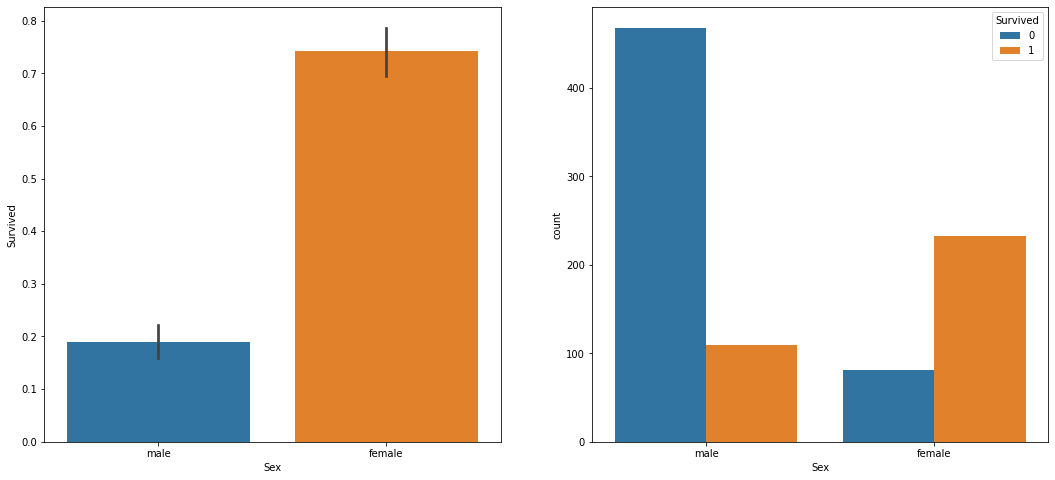

In [9]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
men = train_data.loc[train_data.Sex == 'male']['Survived']
print(f'{sum(women) / len(women) * 100:.4f}% of women Survived')
print(f'{sum(men) / len(men) * 100:.4f}% of men Survived')

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='Sex', y='Survived', data=train_data, ax=ax1)
sns.countplot(x="Sex", hue="Survived", data=train_data, ax=ax2)

**Exploring survival rate in the different Passenger Class**
* Orange = Survived
* Blue = Nor Survived

62.9630% in Pclass 1 Survived
47.2826% in Pclass 2 Survived
24.2363% in Pclass 3 Survived


/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


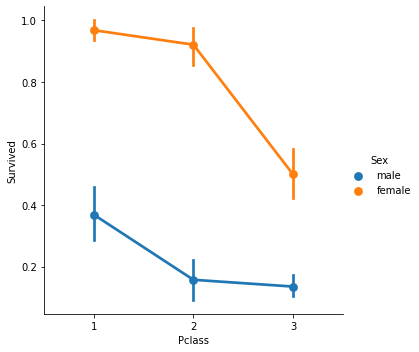

In [10]:
pc1 = train_data.loc[train_data.Pclass == 1]['Survived']
pc2 = train_data.loc[train_data.Pclass == 2]['Survived']
pc3 = train_data.loc[train_data.Pclass == 3]['Survived']

print(f'{sum(pc1) / len(pc1) * 100:.4f}% in Pclass 1 Survived')
print(f'{sum(pc2) / len(pc2) * 100:.4f}% in Pclass 2 Survived')
print(f'{sum(pc3) / len(pc3) * 100:.4f}% in Pclass 3 Survived')

sns.factorplot('Pclass', 'Survived', hue='Sex', data = train_data)


**Exploring survival rate if one had Siblings/Spouses Aboard**

53.5885% Survived with one Siblings/Spouses on ship
46.4286% Survived with two Siblings/Spouses on ship
34.5395% Survived with zero Siblings/Spouses on ship
25.0000% Survived with three Siblings/Spouses on ship
16.6667% Survived with four Siblings/Spouses on ship
0.0000% Survived with five Siblings/Spouses on ship
0.0000% Survived with eight Siblings/Spouses on ship


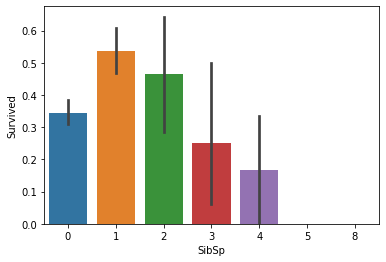

In [11]:
SibSp0 = train_data.loc[train_data.SibSp == 0]['Survived']
SibSp1 = train_data.loc[train_data.SibSp == 1]['Survived']
SibSp2 = train_data.loc[train_data.SibSp == 2]['Survived']
SibSp3 = train_data.loc[train_data.SibSp == 3]['Survived']
SibSp4 = train_data.loc[train_data.SibSp == 4]['Survived']
SibSp5 = train_data.loc[train_data.SibSp == 5]['Survived']
SibSp8 = train_data.loc[train_data.SibSp == 8]['Survived']


print(f'{sum(SibSp1) / len(SibSp1) * 100:.4f}% Survived with one Siblings/Spouses on ship')
print(f'{sum(SibSp2) / len(SibSp2) * 100:.4f}% Survived with two Siblings/Spouses on ship')
print(f'{sum(SibSp0) / len(SibSp0) * 100:.4f}% Survived with zero Siblings/Spouses on ship')
print(f'{sum(SibSp3) / len(SibSp3) * 100:.4f}% Survived with three Siblings/Spouses on ship')
print(f'{sum(SibSp4) / len(SibSp4) * 100:.4f}% Survived with four Siblings/Spouses on ship')
print(f'{sum(SibSp5) / len(SibSp5) * 100:.4f}% Survived with five Siblings/Spouses on ship')
print(f'{sum(SibSp8) / len(SibSp8) * 100:.4f}% Survived with eight Siblings/Spouses on ship')

sns.barplot(x='SibSp', y='Survived', data=train_data)

**Exploring survival rate if one had Parents/Children Aboard**

34.3658% with Parents/Children Aboard Survived: 233 out of 678 people
55.0847% with Parents/Children Aboard Survived: 65 out of 118 people
50.0000% with Parents/Children Aboard Survived: 40 out of 80 people
60.0000% with Parents/Children Aboard Survived: 3 out of 5 people
0.0000% with Parents/Children Aboard Survived: 0 out of 4 people
20.0000% with Parents/Children Aboard Survived: 1 out of 5 people
0.0000% with Parents/Children Aboard Survived: 0 out of 1 people


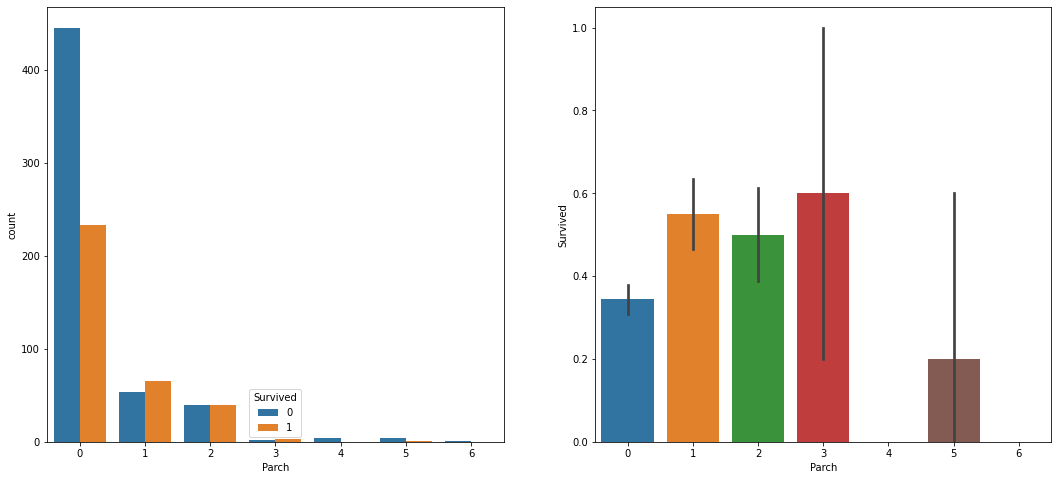

In [12]:
Parch0 = train_data.loc[train_data.Parch == 0]['Survived']
Parch1 = train_data.loc[train_data.Parch == 1]['Survived']
Parch2 = train_data.loc[train_data.Parch == 2]['Survived']
Parch3 = train_data.loc[train_data.Parch == 3]['Survived']
Parch4 = train_data.loc[train_data.Parch == 4]['Survived']
Parch5 = train_data.loc[train_data.Parch == 5]['Survived']
Parch6 = train_data.loc[train_data.Parch == 6]['Survived']

print(f'{sum(Parch0) / len(Parch0) * 100:.4f}% with Parents/Children Aboard Survived: {sum(Parch0)} out of {len(Parch0)} people')
print(f'{sum(Parch1) / len(Parch1) * 100:.4f}% with Parents/Children Aboard Survived: {sum(Parch1)} out of {len(Parch1)} people')
print(f'{sum(Parch2) / len(Parch2) * 100:.4f}% with Parents/Children Aboard Survived: {sum(Parch2)} out of {len(Parch2)} people')
print(f'{sum(Parch3) / len(Parch3) * 100:.4f}% with Parents/Children Aboard Survived: {sum(Parch3)} out of {len(Parch3)} people')
print(f'{sum(Parch4) / len(Parch4) * 100:.4f}% with Parents/Children Aboard Survived: {sum(Parch4)} out of {len(Parch4)} people')
print(f'{sum(Parch5) / len(Parch5) * 100:.4f}% with Parents/Children Aboard Survived: {sum(Parch5)} out of {len(Parch5)} people')
print(f'{sum(Parch6) / len(Parch6) * 100:.4f}% with Parents/Children Aboard Survived: {sum(Parch6)} out of {len(Parch6)} people')

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(18, 8))
sns.countplot(data=train_data, x='Parch', hue='Survived', ax=ax1)
sns.barplot(x='Parch', y='Survived', data=train_data, ax=ax2)

**The data shows that some people had cabins and some did not. We coverted the information to a boolean.**
* Orange = Survived
* Blue = Nor Survived

29.9854% With Out a Cabin Survived
66.6667% With a Cabin Survived


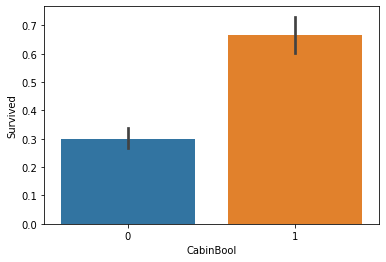

In [13]:
train_data['CabinBool'] = train_data.Cabin.notnull().astype('int')
test_data['CabinBool'] = test_data.Cabin.notnull().astype('int')

CabinNo = train_data.loc[train_data.CabinBool == 0]['Survived']
CabinYes = train_data.loc[train_data.CabinBool == 1]['Survived']

print(f'{sum(CabinNo) / len(CabinNo) * 100:.4f}% With Out a Cabin Survived')
print(f'{sum(CabinYes) / len(CabinYes) * 100:.4f}% With a Cabin Survived')


sns.barplot(x='CabinBool', y='Survived', data=train_data)

**Survival rate based on departure location.**
* S = SouthHampton
* C = Cherbourg
* Q = Queenstown

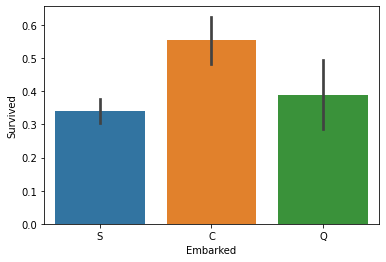

In [14]:
sns.barplot(x='Embarked', y='Survived', data=train_data)

# 5. Fill NaN and Bin the age Data
**Check the unique values**

In [15]:
train_data.Age.unique()


array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

**Fill NaN values with -0.5 and assign to unknown group**

In [16]:
train_data.Age.fillna(-0.5, inplace=True)
test_data.Age.fillna(-0.5, inplace=True)
all_data = (train_data, test_data)
for dataset in all_data:
    print(pd.isnull(dataset).sum())
    print('-------------')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
CabinBool        0
dtype: int64
-------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
CabinBool        0
dtype: int64
-------------


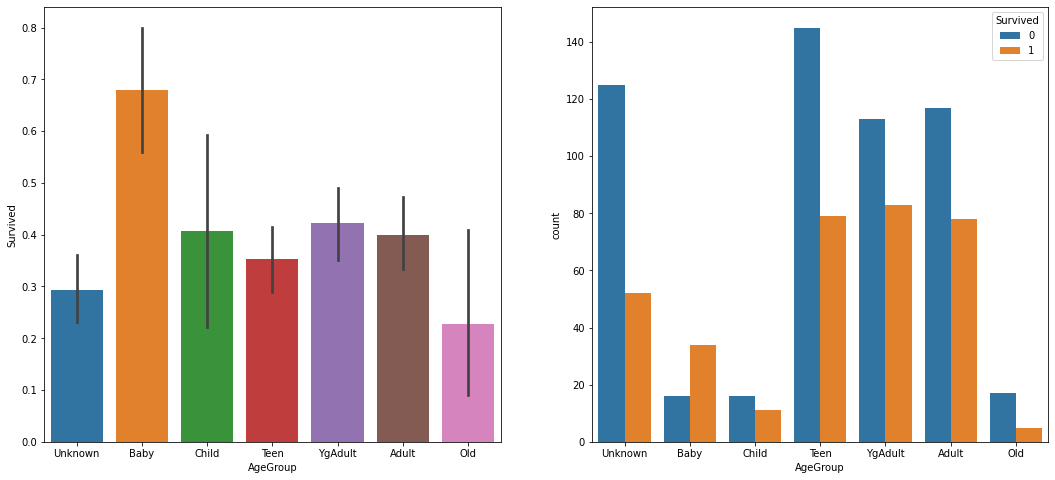

In [17]:
bins = [-1, 0, 7, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teen', 'YgAdult', 'Adult', 'Old']
train_data['AgeGroup'] = pd.cut(train_data.Age, bins, labels=labels)
test_data['AgeGroup'] = pd.cut(test_data.Age, bins, labels=labels)

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='AgeGroup', y='Survived', data=train_data, ax=ax1)
sns.countplot(data=train_data, x='AgeGroup', hue='Survived', ax=ax2)

**Bin the Fare Data**

In [18]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

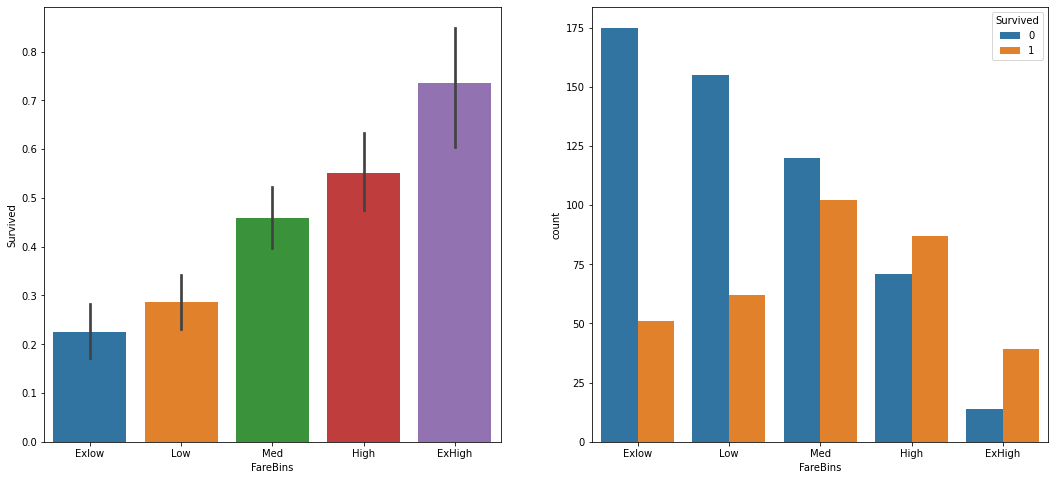

In [19]:
bins = [0, 8, 15, 32, 100, np.inf]
labels = ['Exlow', 'Low', 'Med', 'High', 'ExHigh']
train_data['FareBins'] = pd.cut(train_data.Fare, bins, labels=labels)
test_data['FareBins'] = pd.cut(test_data.Fare, bins, labels=labels)

fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='FareBins', y='Survived', data=train_data, ax=ax1)
sns.countplot(data=train_data, x='FareBins', hue='Survived', ax=ax2)

# 6. Run model and get results

In [20]:
from sklearn.ensemble import RandomForestClassifier

y = train_data.Survived

features = ["Pclass", "Sex", "SibSp", "Parch", "Embarked", "CabinBool", "AgeGroup", "FareBins"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('LPA_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
